In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
# Step 1: Load dataset
df = pd.read_csv("sales_data_sample.csv", encoding='latin1')
print("Dataset loaded successfully.")
print(df.head())

# Step 2: Check info
print(df.info())


Dataset loaded successfully.
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 

In [3]:
# Step 3: Select relevant numeric features for clustering
numeric_df = df.select_dtypes(include=['float64', 'int64']).copy()
numeric_df = numeric_df.dropna()  # Remove missing values
print("\nNumeric columns used for clustering:\n", numeric_df.columns)


Numeric columns used for clustering:
 Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'MSRP'],
      dtype='object')


In [4]:
# Step 4: Normalize data (important for K-Means)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

In [5]:
# Step 5: Use Elbow Method to determine optimal number of clusters
wcss = []  # Within-cluster sum of squares
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

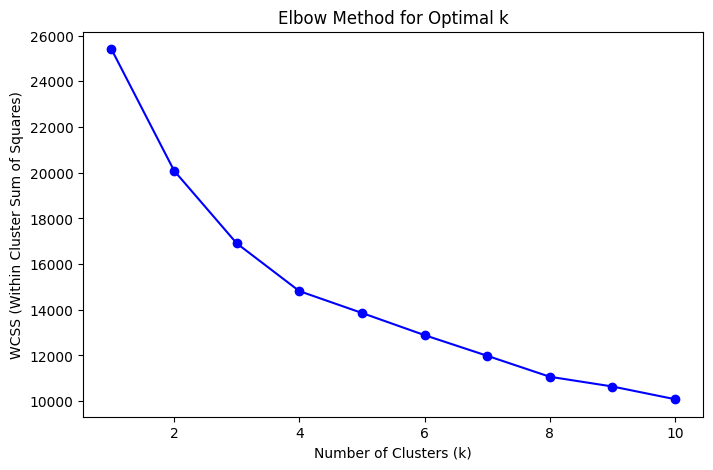

In [6]:
# Step 6: Plot the Elbow graph
plt.figure(figsize=(8,5))
plt.plot(K, wcss, 'bo-')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Within Cluster Sum of Squares)")
plt.show()

In [7]:
# Step 7: Choose optimal k (from the elbow point, e.g., 3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)


In [8]:

# Step 8: Add cluster labels to the dataset
numeric_df['Cluster'] = clusters
print("\nClustered Data Sample:\n", numeric_df.head())


Clustered Data Sample:
    ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  QTR_ID  \
0        10107               30      95.70                2  2871.00       1   
1        10121               34      81.35                5  2765.90       2   
2        10134               41      94.74                2  3884.34       3   
3        10145               45      83.26                6  3746.70       3   
4        10159               49     100.00               14  5205.27       4   

   MONTH_ID  YEAR_ID  MSRP  Cluster  
0         2     2003    95        1  
1         5     2003    95        2  
2         7     2003    95        1  
3         8     2003    95        1  
4        10     2003    95        1  


In [9]:
# Step 9: Analyze cluster centers
print("\nCluster Centers (Scaled Values):\n", kmeans.cluster_centers_)


Cluster Centers (Scaled Values):
 [[ 0.80842073  0.15626173  0.1599169  -0.10322049  0.13943053 -1.15351152
  -1.15675151  1.18412804  0.07164397]
 [-0.26408187  0.0398995   0.70503285  0.01560294  0.53444299  0.50961433
   0.5069744  -0.44559165  0.62315027]
 [-0.30770787 -0.1781969  -1.04941352  0.06293662 -0.81019145  0.26569688
   0.2717579  -0.3739815  -0.87128259]]
